In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [31]:
# Путь к JSON файлам с данными игроков
player1_file = './data/player_match_data_11736.json'
player2_file = './data/player_match_data_227.json'

In [35]:
# Загрузка данных об игроках
player1_stats = pd.read_json(player1_file)
player2_stats = pd.read_json(player2_file)

# Создание DataFrame для удобства анализа и визуализации
df1 = pd.DataFrame(player1_stats)
df2 = pd.DataFrame(player2_stats)

print(df1.describe())
df1.info()
print(df1.head())

print(df2.describe())
df2.info()
print(df2.head())

           goals      shots         xG       time    h_goals    a_goals  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean    0.666667   2.380952   0.460266  66.476190   1.904762   1.666667   
min     0.000000   0.000000   0.000000  13.000000   0.000000   0.000000   
25%     0.000000   1.000000   0.091664  69.000000   1.000000   1.000000   
50%     0.000000   2.000000   0.236689  72.000000   1.000000   1.000000   
75%     1.000000   3.000000   0.712300  82.000000   3.000000   3.000000   
max     3.000000   7.000000   1.944304  90.000000   5.000000   4.000000   
std     0.856349   1.802115   0.499809  24.113521   1.670472   1.390444   

                                date            id  season      roster_id  \
count                             21     21.000000    21.0      21.000000   
mean   2023-11-01 18:17:08.571428608  22792.619048  2023.0  620970.428571   
min              2023-08-12 00:00:00  22687.000000  2023.0  603904.000000   
25%             

In [44]:


# Имена показателей статистики
stats_labels = [ 'shots', 'xG', 'time', 'position', 'goals', 'xA', 'assists', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup']

# Значения показателей статистики для каждого игрока
player1_values = [df1[label].iloc[0] for label in stats_labels]
player2_values = [df2[label].iloc[0] for label in stats_labels]

# Углы для графика типа радар
num_vars = len(stats_labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Добавление первого элемента в конец списка, чтобы график был замкнутым
player1_values += player1_values[:1]
player2_values += player2_values[:1]
angles += angles[:1]



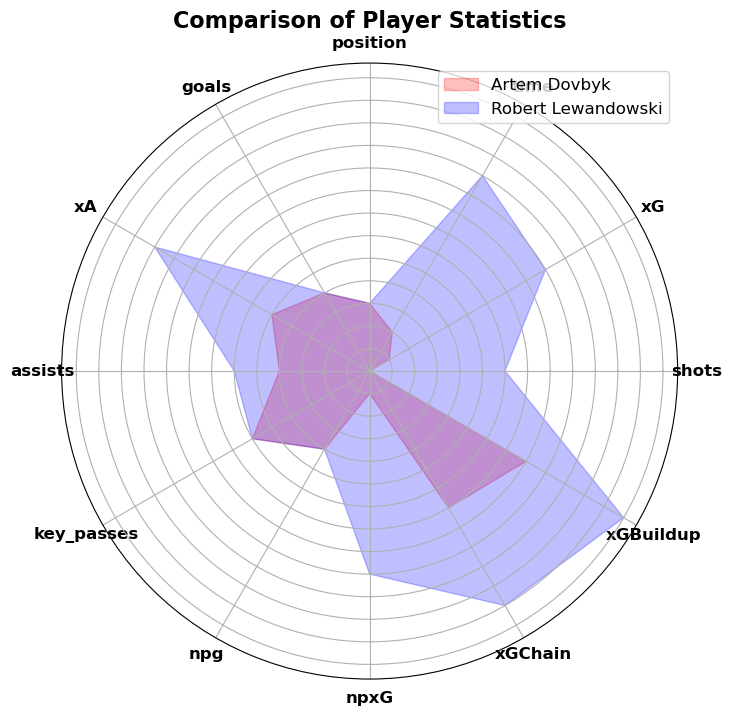

In [45]:
# Построение графика типа радар
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, player1_values, color='red', alpha=0.25, label='Artem Dovbyk')
ax.fill(angles, player2_values, color='blue', alpha=0.25, label='Robert Lewandowski')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats_labels, fontsize=12, fontweight='bold')
ax.legend(loc='upper right', fontsize='large')
plt.title('Comparison of Player Statistics', size=16, weight='bold')
plt.show()